##Name: Ameer Hamza
##Email: ameer4955@gmail.com

#Train a Fully connected Neural Network on Fashion MNIST dataset
##1. Dataset
##1.a. You are provided with the fashion MNIST dataset
##1.b. Read the description of dataset [here](https://www.tensorflow.org/datasets/catalog/fashion_mnist#:~:text=Fashion%2DMNIST%20is%20a%20dataset,a%20label%20from%2010%20classes.)
Nine different types of dress items are in given dataset with 60,000 training and 10,000 testing examples.

In [15]:
import matplotlib.pyplot as plt

import tensorflow, keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

##2. Split the data into x_train, y_train, x_test and y_test.

In [16]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

##2.a. Display the sample images from x_train

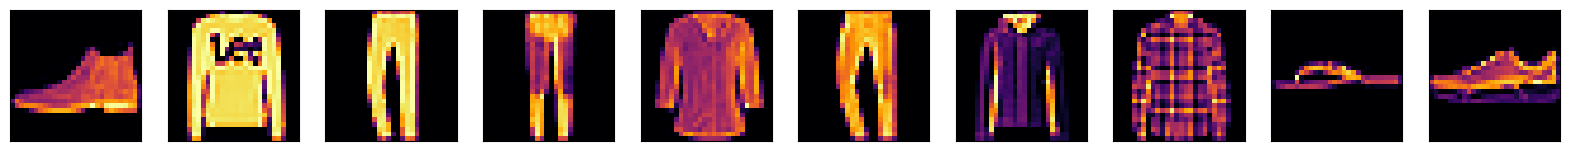

In [17]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.inferno()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()


##2.b. Display the shape of x_train and y_train

In [18]:
# Print the shapes of the original training data and labels
print(f"X_train shape: {X_train.shape}\nY_train shape:{Y_train.shape}")

X_train shape: (60000, 28, 28)
Y_train shape:(60000,)


##3. Flatten the images
##3.a. Reshape the images from 28x28 to 784-dimension vector

In [19]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(f"Flattened X_train shape: {X_train.shape}\nFlattened Y_train shape:{X_test.shape}")

Flattened X_train shape: (60000, 784)
Flattened Y_train shape:(10000, 784)


##4. Scale the data
##4.a. Convert the data into float 32 type

In [20]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##4.b. Scale the data by dividing x_train and y_train by 255

In [21]:
# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

##4.c. Display the shape of x_train and y_train after scaling.

In [22]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, len(classes))
Y_test = to_categorical(Y_test, len(classes))

# Print the shapes of the preprocessed training data and labels
print(f"Scaled X_train shape: {X_train.shape}\nScaled Y_train shape:{Y_train.shape}")

Scaled X_train shape: (60000, 784)
Scaled Y_train shape:(60000, 10)


##5. Define the hyper parameters for the neural networks


In [23]:
#5.a. Learning rate
lr = 0.001

#5.b. No. of Epochs
epochs = 10

#5.c. Batch size
batch_size = 200

#5.d. Input_size
input_size = 784

#5.e. Hidden layer1
hidden1 = 400

#5.f. Hidden layer2
hidden2 = 20

#5.g. Output_size
output_size = 10

##6. Define the structure of your neural network

In [24]:
# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

#6.a. No of hidden layers
hidden_layers = 2

#6.b. Activation function for each layer neurons
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
model.add(Dense(hidden2, activation='relu'))

#6.c. Number of output layer neurons and activation function
model.add(Dense(output_size, activation='softmax'))

#6.d. Compile the model and provide following arguments
#i. Loss function
#ii. Optimizer
#iii. Metric
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = Adam(lr))

#6.e. Display the summary of the mode
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               314000    
                                                                 
 dense_4 (Dense)             (None, 20)                8020      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


##7. Train the Neural Network

In [25]:
#7.a. Fit the Model
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 0.5679 - accuracy: 0.8016
Epoch 2/10
300/300 [==============================] - 3s 11ms/step - loss: 0.4007 - accuracy: 0.8581
Epoch 3/10
300/300 [==============================] - 4s 12ms/step - loss: 0.3608 - accuracy: 0.8696
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3318 - accuracy: 0.8802
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.3105 - accuracy: 0.8874
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2893 - accuracy: 0.8956
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2794 - accuracy: 0.8975
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2649 - accuracy: 0.9037
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2557 - accuracy: 0.9055
Epoch 10/10
300/300 [==============================] - 3s 11ms/step - loss: 0.2462 - accura

##8. Test the model
##8.a. Find the testing accuracy of the model

In [26]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.868


##8.b. Compare the training and testing accuracy and write you observation in the comments

In [27]:
# Training accuracy is 0.9197 while testing accuracy is 0.8774. The small /
#difference shows that this dataset is neither underfit or overfit.

##8.c. Display the predicted labels along the input image

1/1 [==============================] - 0s 22ms/step


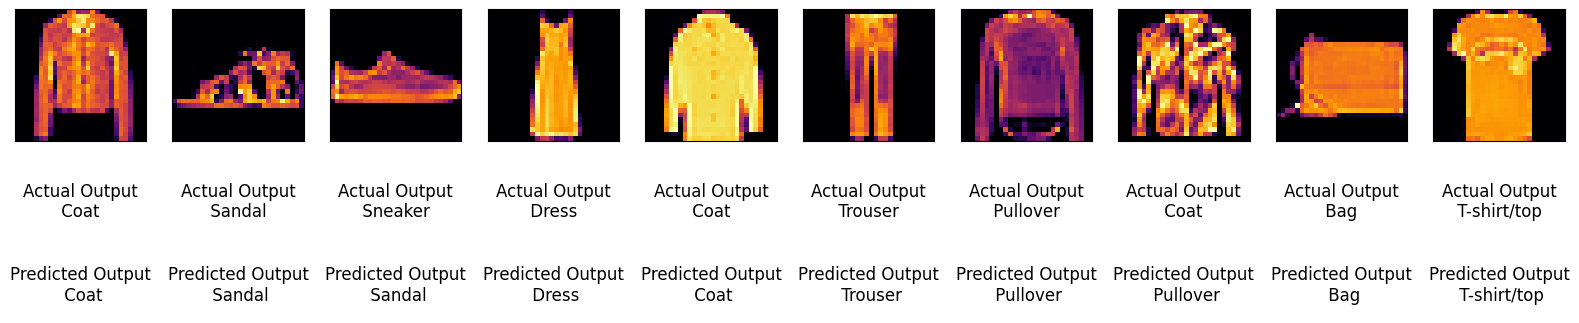

In [28]:
# Define a mask for selecting a range of indices (20 to 39)
mask = range(20, 40)

# Select the last 10 samples from the test set for visualization
X_valid = X_test[10:20]
actual_labels = Y_test[10:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.inferno()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    actual_output = classes[list(actual_labels[i]).index(1)]
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    predicted_output = classes[predicted_digit]
    ax = plt.subplot(2, n, i + 1 + n)
    output_str = f"""Actual Output\n {actual_output} \n\n\nPredicted Output\n {predicted_output}"""
    plt.text(0.5, 0.5, str(output_str), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()